In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('seattle-weather .csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [2]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [3]:
df.shape

(1461, 6)

In [4]:
pd.isnull(df).sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


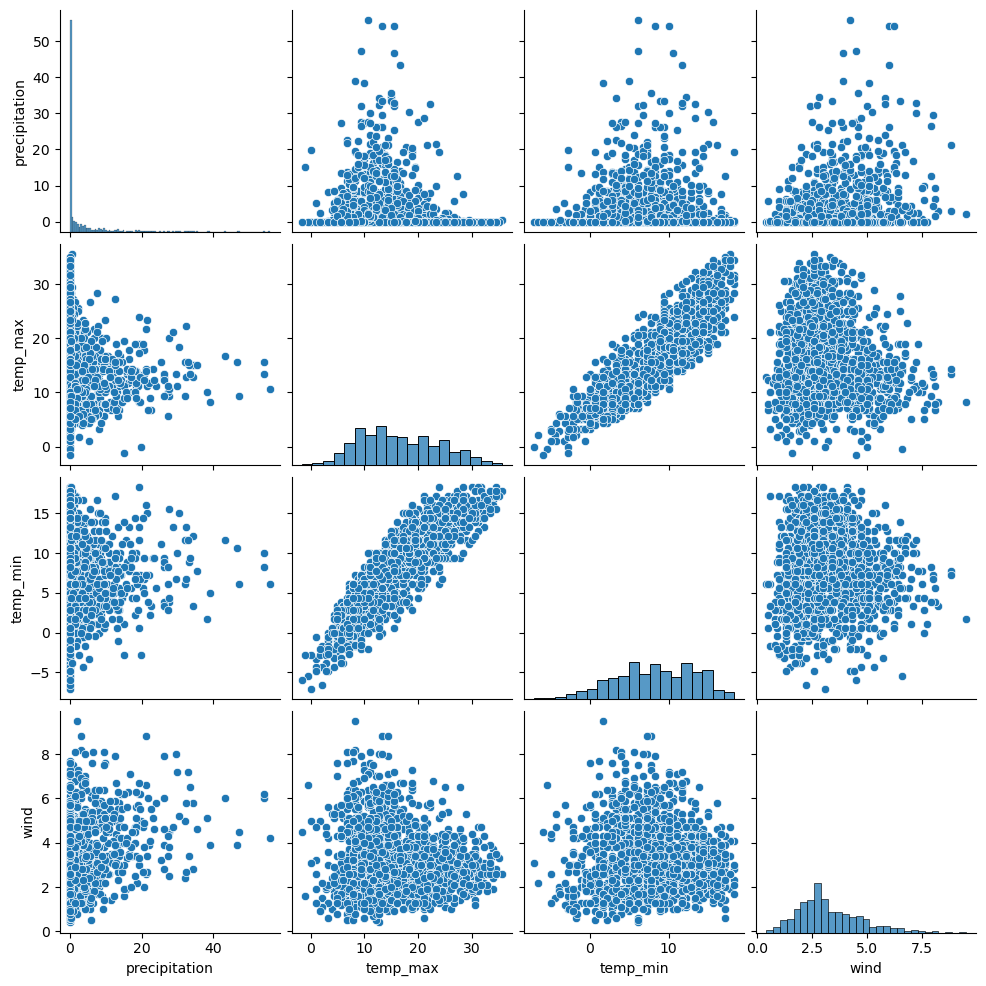

In [7]:
sns.pairplot(df)

<Axes: >

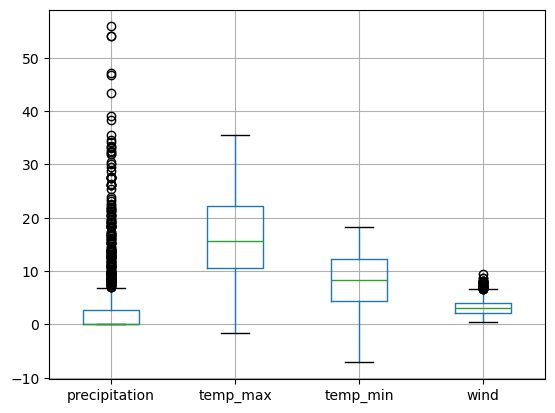

In [8]:
df.boxplot()

In [9]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

Prediction of data using decision tree regression

In [11]:
from sklearn.preprocessing import LabelEncoder
df['weather']=LabelEncoder().fit_transform(df['weather'])

In [12]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [13]:
X

array([['2012-01-01', 0.0, 12.8, 5.0, 4.7],
       ['2012-01-02', 10.9, 10.6, 2.8, 4.5],
       ['2012-01-03', 0.8, 11.7, 7.2, 2.3],
       ...,
       ['2015-12-29', 0.0, 7.2, 0.6, 2.6],
       ['2015-12-30', 0.0, 5.6, -1.0, 3.4],
       ['2015-12-31', 0.0, 5.6, -2.1, 3.5]], dtype=object)

In [14]:
y

array([0, 2, 2, ..., 1, 4, 4])

In [15]:
df['weather'].value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

Here,after label encoding the values in the  categorical column weather
 0 refers to drizzle,
1 refers to fog,
2 refers to rain,
3 refers to snow,
4 refers to sun,

In [17]:
from sklearn.model_selection import train_test_split
features=['precipitation', 'temp_max', 'temp_min', 'wind']
X=df[features]
y=df.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 1)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score

model1=DecisionTreeRegressor()
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))
print(accuracy_score(test_y,pred1))

Mean Absolute Error: 0.754098
0.7295081967213115


In [19]:
print(model1.predict([[10.1,7.8,3.7,2.1]]))

[2.]


In [20]:
print(model1.predict([[0.3,5.0,2.6,0.7]]))

[2.]


In [21]:
import matplotlib

Text(0, 0.5, 'test_y')

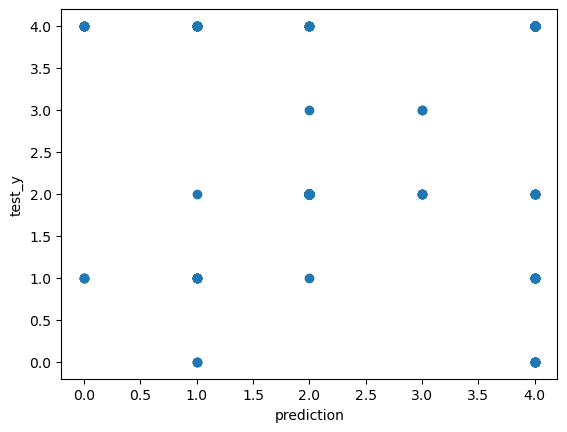

In [22]:
matplotlib.pyplot.scatter(test_y,pred1)
matplotlib.pyplot.xlabel('prediction')
matplotlib.pyplot.ylabel('test_y')

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(test_y, pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.21      0.21      0.21        33
           2       0.91      0.94      0.93       158
           3       0.67      0.29      0.40         7
           4       0.73      0.71      0.72       154

    accuracy                           0.73       366
   macro avg       0.51      0.43      0.45       366
weighted avg       0.73      0.73      0.73       366



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
print(confusion_matrix(test_y, pred1))

[[  0   4   0   0  10]
 [  3   7   1   0  22]
 [  0   1 148   1   8]
 [  0   0   5   2   0]
 [ 15  21   8   0 110]]
